In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set() #Set Seaborn formatting

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Reading the csv file containg the data 

titanic_dataset = pd.read_csv('/home/arman/github_portfolio_spiced/Project_02_classification/train.csv', index_col = 0)
titanic_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Exploring the data / Feature engineering / preparation of the data for ML models

In [4]:
# let's try to draw insights from the data...
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# we can see that we have 6 numerical columns and 5 categorical columns

In [6]:
titanic_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- There were 891 passengers and average survival rate was 38%
- Passenger's age varied between less than 1 year old to 80 years with an average around 30 years old

In [7]:
# Let's create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
table = pd.DataFrame(titanic_dataset.groupby(['Pclass', 'Sex'])['Survived'].sum())
table

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [8]:
# we see that regardless of passenger class, the number of survived females were considerably higher than males

In [9]:
# However, the columns 'Survived' and 'Pclas' are actually also somehow categorical. 
# Let’s change their data type to string.
columns = ['Survived', 'Pclass']
for i in columns:
  titanic_dataset[i] = titanic_dataset[i].astype(str)

titanic_dataset.dtypes

Survived     object
Pclass       object
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
# Also let's change the 0 & 1 in the 'Survived' column to 'No' & 'Yes' '',',''
# Additionally, better to change the 'S' &'C' & 'Q' in the column 'Embarked', to their complete name for better readability 
titanic_dataset['Survived'] = titanic_dataset['Survived'].replace('0', 'No')
titanic_dataset['Survived'] = titanic_dataset['Survived'].replace('1', 'Yes')
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].replace('S', 'Southampton')
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].replace('C', 'Cherbourg')
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].replace('Q', 'Queenstown')
titanic_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton


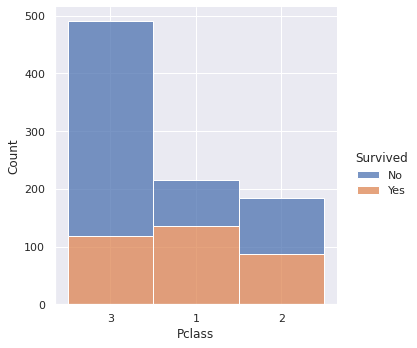

In [11]:
sns.displot(data=titanic_dataset, x="Pclass", hue="Survived", multiple="stack")

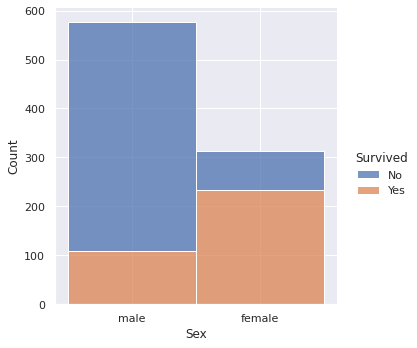

In [12]:
sns.displot(data=titanic_dataset, x="Sex", hue="Survived", multiple="stack")

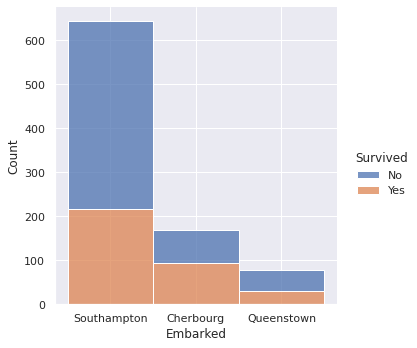

In [13]:
sns.displot(data=titanic_dataset, x="Embarked", hue="Survived", multiple="stack")

In [14]:
# Interestingly, what we see is that most of 3rd class passengers did not survive showing that they were not priority during the rescue
# Also we see that females where priority during the rescue
# No correlation between embarkment location and survival could be observed, only we know that mostly were embarked from southhampton.

In [15]:
titanic_dataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
titanic_dataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:
# the value counts above shows that in general, most of the passengers did not have Sibling, Spouse, Parent or children with them.

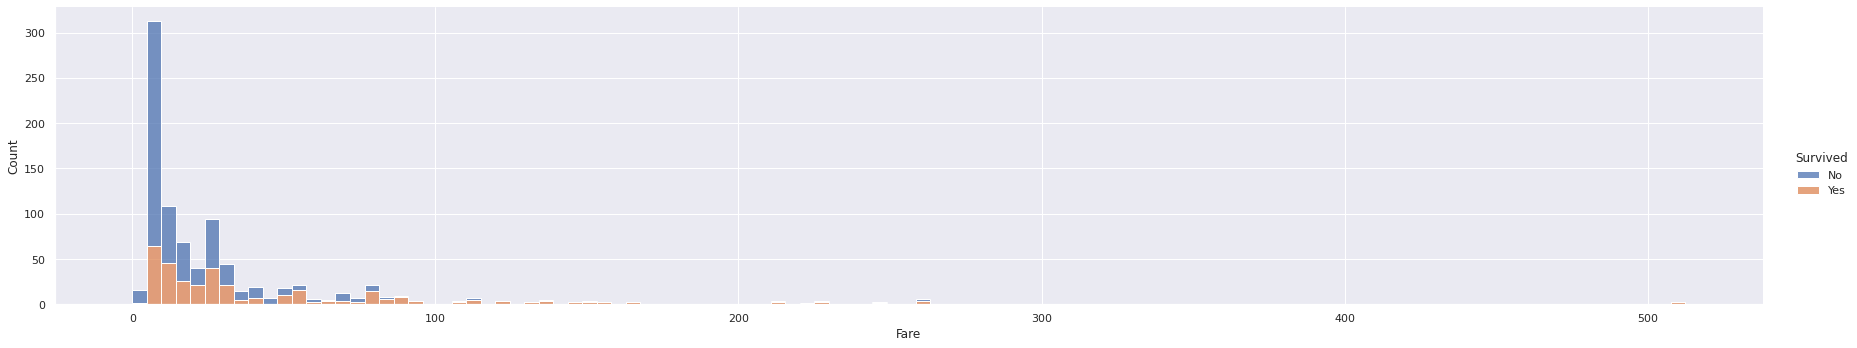

In [18]:
sns.displot(data=titanic_dataset, x="Fare", hue="Survived", multiple="stack", height=5, aspect=5)

/home/arman/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

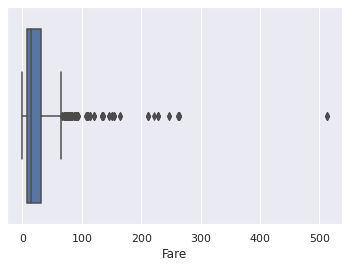

In [19]:
sns.boxplot(titanic_dataset['Fare'])

In [20]:
# let's check the percenatge of missing data in each column
percent_missing = (titanic_dataset.isnull().sum() * 100) / len(titanic_dataset)
print(round(percent_missing,2))

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64


<AxesSubplot:ylabel='PassengerId'>

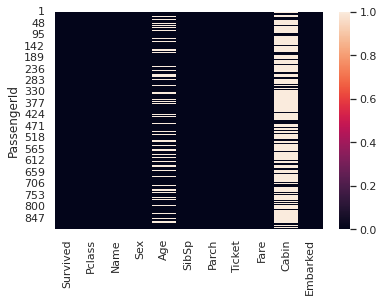

In [21]:
#Let's take a look at missing values heatmap
sns.heatmap(titanic_dataset.isna())

In [22]:
# we see that in the columns 'Age', 'Cabin' and 'embarked' we have some missing values that we should take care of them for machine learning
# in the column 'age', 19 % percent of the values are missing and we are going to replace them (impute) with the mean age

In [23]:
mean_age = round(titanic_dataset['Age'].mean())
mean_age

30

In [24]:
titanic_dataset['Age'] = titanic_dataset['Age'].replace(np.nan, mean_age)
percent_missing = (titanic_dataset.isnull().sum() * 100) / len(titanic_dataset)
print(round(percent_missing,2))

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64


In [25]:
# also we are going to drop the column 'Cabin' because we have around 77% missing values and may introduce bias in the model!
titanic_dataset.drop("Cabin", inplace=True, axis=1)

In [26]:
titanic_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...
887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Southampton
888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,Southampton
889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,Southampton


In [27]:
# in column 'Embarked', we have only a few missing values (less than 1%!) which we are going to replace them with most frequent occuring value
# (which is 'Southhampton')

In [28]:
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].replace(np.nan, 'Southampton')
titanic_dataset.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [29]:
# looks like all missing values are taken care of..

In [30]:
### NOW! look at the data, what columns that you are going to use as features? what columns do not help to predict if a passenger survives or not?
### our target value for modelling (y)  is 'Survived' column. now lets see which columns can be used as  features (X)
### here 'Name' and 'Ticket' seems to be of no use for our goal! lets drop them 

In [31]:
titanic_dataset.drop(['Ticket', 'Name'], axis = 1, inplace = True)
titanic_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,No,3,male,22.0,1,0,7.2500,Southampton
2,Yes,1,female,38.0,1,0,71.2833,Cherbourg
3,Yes,3,female,26.0,0,0,7.9250,Southampton
4,Yes,1,female,35.0,1,0,53.1000,Southampton
5,No,3,male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
887,No,2,male,27.0,0,0,13.0000,Southampton
888,Yes,1,female,19.0,0,0,30.0000,Southampton
889,No,3,female,30.0,1,2,23.4500,Southampton


In [32]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.9+ KB


#### from the remaining features, 3 of them ('Pclass', 'sex' and 'Embarked' are categorical and need onehot encoding. i will turn back the 'Pclass' to integer and for the others i will perform one hot encoding

In [33]:
column = ['Pclass']
for i in column:
  titanic_dataset[i] = titanic_dataset[i].astype(int)

titanic_dataset.dtypes

Survived     object
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [34]:
dummy1 = pd.get_dummies(titanic_dataset[['Sex', 'Embarked']])
dummy1

,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,
1,0,1,0,0,1
2,1,0,1,0,0
3,1,0,0,0,1
4,1,0,0,0,1
5,0,1,0,0,1
...,...,...,...,...,...
887,0,1,0,0,1
888,1,0,0,0,1
889,1,0,0,0,1


In [35]:
# Adding the dummy to the main dataframe
df_for_ml = pd.concat([titanic_dataset, dummy1], axis=1)
df_for_ml

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,,,,,,,,,
1,No,3,male,22.0,1,0,7.2500,Southampton,0,1,0,0,1
2,Yes,1,female,38.0,1,0,71.2833,Cherbourg,1,0,1,0,0
3,Yes,3,female,26.0,0,0,7.9250,Southampton,1,0,0,0,1
4,Yes,1,female,35.0,1,0,53.1000,Southampton,1,0,0,0,1
5,No,3,male,35.0,0,0,8.0500,Southampton,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,No,2,male,27.0,0,0,13.0000,Southampton,0,1,0,0,1
888,Yes,1,female,19.0,0,0,30.0000,Southampton,1,0,0,0,1
889,No,3,female,30.0,1,2,23.4500,Southampton,1,0,0,0,1


In [36]:
df_for_ml_ready = df_for_ml.drop(['Sex', 'Embarked'], axis=1)
df_for_ml_ready

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,,,,,,,
1,No,3,22.0,1,0,7.2500,0,1,0,0,1
2,Yes,1,38.0,1,0,71.2833,1,0,1,0,0
3,Yes,3,26.0,0,0,7.9250,1,0,0,0,1
4,Yes,1,35.0,1,0,53.1000,1,0,0,0,1
5,No,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,No,2,27.0,0,0,13.0000,0,1,0,0,1
888,Yes,1,19.0,0,0,30.0000,1,0,0,0,1
889,No,3,30.0,1,2,23.4500,1,0,0,0,1


### Machine learning: Logistic Regression

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_for_ml_ready.drop('Survived',axis=1), 
                                                    df_for_ml_ready['Survived'], test_size=0.30, 
                                                    random_state=42)

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# create predicted values
ypred = logmodel.predict(X_train)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [49]:
accuracy_score(ypred, y_train)
# Accuracy on adjusted model

0.8025682182985554

In [52]:

from sklearn.metrics import plot_confusion_matrix


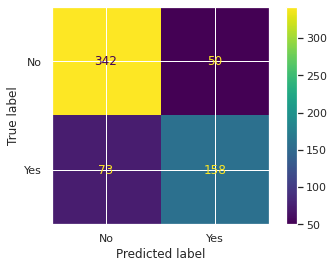

In [53]:
plot_confusion_matrix(logmodel, X_train, y_train)

### we can also find the Accuracy, precision, f1 score etc, by impoorting classification report

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.81      0.87      0.84       157
         Yes       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [60]:
#Cross validation:
from sklearn.model_selection import cross_val_score

In [61]:
accuracy = cross_val_score(logmodel, X_train, ypred, cv=5, scoring='accuracy')
print("Cross-validation scores: ", accuracy)

Cross-validation scores:  [0.968      0.992      0.968      0.98387097 0.98387097]


/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

### Machine learning: Random Forest

In [62]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
rfc_pred = rfc.predict(X_test)

In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          No       0.80      0.84      0.82       157
         Yes       0.76      0.71      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



### we can se that here, Logiostic Regression performed better than Random Forest